In [36]:
import pandas as pd 
from pandas import Series,DataFrame
from bs4 import BeautifulSoup
import requests

In [5]:
url = 'http://www.ucop.edu/operating-budget/budgets-and-reports/legislative-reports/2013-14-legislative-session.html'

In [6]:
# Request content from web page
result = requests.get(url)
c = result.content

# Set as Beautiful Soup Object
soup = BeautifulSoup(c)

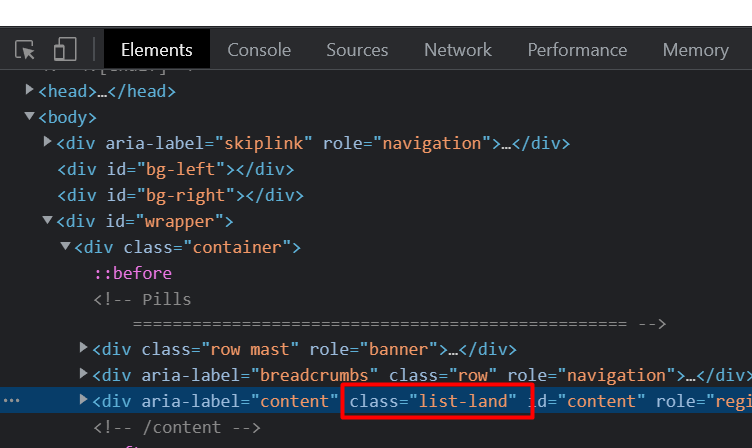

In [9]:
# We want the table section, go to site and find the related class in the Elements
summary = soup.find("div",{'class':'list-land','id':'content'})

# Find the tables in the HTML
tables = summary.find_all('table')

In [10]:
tables

[<table cellpadding="5" cellspacing="0" class="table-striped" id="report" summary="2009-10 Legislative Reports in a table with one level of column and row headers" width="100%">
 <tbody>
 <tr>
 <th scope="col"></th><th scope="col">Date</th><th scope="col">Report title</th>
 </tr>
 <tr>
 <td scope="row">1</td>
 <td scope="row">08/01/13</td>
 <td scope="row"><a href="../../_files/legreports/1314/2013-14cobcp.pdf">2013-14 (EDU 92495) Proposed Capital Outlay Projects (2013-14 only) (pdf)</a></td>
 </tr>
 <tr>
 <td scope="row">2</td>
 <td scope="row">09/01/13</td>
 <td scope="row"><a href="../../_files/legreports/1314/2014-15cobcp.pdf">2014-15  (EDU 92495) Proposed Capital Outlay Projects (pdf)</a></td>
 </tr>
 <tr>
 <td scope="row">3</td>
 <td scope="row">11/01/13</td>
 <td scope="row"><a href="../../_files/legreports/1314/utilizationofclassroomsandresearchspace-11-1-13.pdf">Utilization of Classroom and Teaching Laboratories (pdf)</a> (<em>Final Report; biennial</em>)</td>
 </tr>
 <tr>
 <t

A 'td' tag defines a standard cell in an HTML table. The 'tr' tag defines a row in an HTML table.
For more options about find_all : https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all

In [18]:
# Set up empty data list
data = []

# Set rows as first indexed object in tables with a row
rows = tables[0].findAll('tr')

# now grab every HTML cell in every row
for tr in rows:
    cols = tr.findAll('td')
    # Check to see if text is in the row
    for td in cols:
        text = td.find(text=True) 
        data.append(text)

In [19]:
data

['1',
 '08/01/13',
 '2013-14 (EDU 92495) Proposed Capital Outlay Projects (2013-14 only) (pdf)',
 '2',
 '09/01/13',
 '2014-15\xa0 (EDU 92495) Proposed Capital Outlay Projects (pdf)',
 '3',
 '11/01/13',
 'Utilization of Classroom and Teaching Laboratories (pdf)',
 '4',
 '11/01/13',
 'Instruction and Research Space Summary & Analysis (pdf)',
 '5',
 '11/15/13',
 'Statewide Energy Partnership Program (pdf)',
 '6',
 '11/30/13',
 '2013-23 Capital Financial Plan (pdf)',
 '7',
 '11/30/13',
 'Projects Savings Funded from Capital Outlay Bond Funds (pdf)',
 '8',
 '12/01/13',
 'Streamlined Capital Projects Funded from Capital (pdf)',
 '9',
 '01/01/14',
 'Annual General Obligation Bonds Accountability (pdf)',
 '10',
 '01/01/14',
 'Small Business Utilization (pdf)',
 '11',
 '01/01/14',
 'Institutional Financial Aid Programs - Preliminary report (pdf)',
 '12',
 '01/10/14',
 'Summer Enrollment (pdf)',
 '13',
 '01/15/14',
 'Contracting Out for Services at Newly Developed Facilities (pdf)',
 '14',
 '03/

In [33]:
# loop to go through the list and grab only the cells with a pdf file in them,
# keep track of the index to set up the date of the report.
# a line has value '\xa0 ' . This is due to a unicode error so replace it.

# Set up empty lists
reports = []
date = []

index = 0

# find the pdf cells
for item in data:
    if 'pdf' in item:
        date.append(data[index-1])
        reports.append(item.replace('\xa0',' '))               
    index += 1

In [34]:
reports

['2013-14 (EDU 92495) Proposed Capital Outlay Projects (2013-14 only) (pdf)',
 '2014-15  (EDU 92495) Proposed Capital Outlay Projects (pdf)',
 'Utilization of Classroom and Teaching Laboratories (pdf)',
 'Instruction and Research Space Summary & Analysis (pdf)',
 'Statewide Energy Partnership Program (pdf)',
 '2013-23 Capital Financial Plan (pdf)',
 'Projects Savings Funded from Capital Outlay Bond Funds (pdf)',
 'Streamlined Capital Projects Funded from Capital (pdf)',
 'Annual General Obligation Bonds Accountability (pdf)',
 'Small Business Utilization (pdf)',
 'Institutional Financial Aid Programs - Preliminary report (pdf)',
 'Summer Enrollment (pdf)',
 'Contracting Out for Services at Newly Developed Facilities (pdf)',
 'Performance Measures (pdf)',
 'Entry Level Writing Requirement (pdf)',
 'Annual Report on Student Financial Support (pdf)',
 'Unique Statewide Pupil Identifier (pdf)',
 'Riverside School of Medicine (pdf)',
 'Receipt and Use of Lottery Funds (pdf)',
 'Cogeneration

In [30]:
date

['08/01/13',
 '09/01/13',
 '11/01/13',
 '11/01/13',
 '11/15/13',
 '11/30/13',
 '11/30/13',
 '12/01/13',
 '01/01/14',
 '01/01/14',
 '01/01/14',
 '01/10/14',
 '01/15/14',
 '03/01/14',
 '03/01/14',
 '03/31/14',
 '04/01/14',
 '04/01/14',
 '05/15/14',
 '07/01/14']

In [37]:
# Set up Dates and Reports as Series
date = Series(date)
reports = Series(reports)

In [43]:
df = pd.concat([date,reports],axis=1)
df.columns = ['Date','Reports']
df

,Date,Reports
0,08/01/13,2013-14 (EDU 92495) Proposed Capital Outlay Pr...
1,09/01/13,2014-15 (EDU 92495) Proposed Capital Outlay P...
2,11/01/13,Utilization of Classroom and Teaching Laborato...
3,11/01/13,Instruction and Research Space Summary & Analy...
4,11/15/13,Statewide Energy Partnership Program (pdf)
5,11/30/13,2013-23 Capital Financial Plan (pdf)
6,11/30/13,Projects Savings Funded from Capital Outlay Bo...
7,12/01/13,Streamlined Capital Projects Funded from Capit...
8,01/01/14,Annual General Obligation Bonds Accountability...
9,01/01/14,Small Business Utilization (pdf)
